### Background and Objective
Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA., specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. In their most recent animal study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. The objective of this assignment is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

### Conclusions


* Capomulin by far was the most effective treatment for squamous cell carcinoma in this study. In terms of tumor volume reduction, the Capomulin-treated mice experienced on average nearly a 9 mm3 volume reduction, which corresponds to a 19% overall reduction in volume. Similarly, the growth of metastatic sites was lower than mice treated with other drugs. The survival rate of the Capomulin-treated mice was the highest amongst the other treatments, with an average of 21 mice surving from the initial sample of 25. 


* The least effective treatment was Ketapril, which resulted in a 57% increase in tumor volume (25.66 mm3), the largest spread of metastatic sites (3.36), and a 44% mouse survival rate.


* Infubinol shows some promise as a treatment in that tumor reduction was slightly greater than the placebo (46% vs. 51%), and Infubinol-treated mice experienced a slower spread of metastatic sites versus Ketapril and the placebo; however, survival rates were the lowest of all groups (36%).

In [2]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np 
from scipy import stats 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df= pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_df = pd.read_csv("data/clinicaltrial_data.csv")
 
# Merge our two data frames together
combined_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtv_dtp = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
mtv_dtp
avg_mtv = mtv_dtp.mean()
avg_mtv = avg_mtv.reset_index()
avg_mtv.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se = mtv_dtp.sem()
# Convert to DataFrame
tumor_se_df = pd.DataFrame(tumor_se)
# Preview DataFrame
tumor_se_df.reset_index(inplace=True, drop=False)
tumor_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [26]:
# Minor Data Munging to Re-Format the Data Frames
tumor_pivot=avg_mtv.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_pivot.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


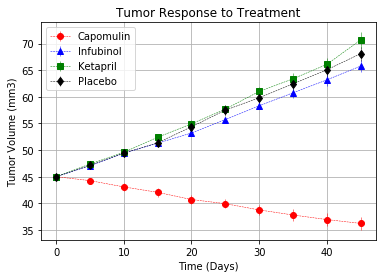

In [22]:
# Generate the Plot (with Error Bars)
assignments = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]
for drug, markers, colors in assignments:
    ste = tumor_se[drug]
    tumor_response = plt.errorbar(tumor_pivot.index, tumor_pivot[drug], ste, fmt=markers, ls='--', color=colors, linewidth=0.5)

plt.legend(loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("tumor_response_to_treatment.png")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ms_dtp = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
ms_dtp
avg_ms = ms_dtp.mean()
avg_ms = avg_ms.reset_index()
avg_ms.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metsite_se = ms_dtp.sem()
# Convert to DataFrame
metsite_se_df = pd.DataFrame(metsite_se)
# Preview DataFrame
metsite_se_df.reset_index(inplace=True, drop=False)
metsite_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [27]:
# Minor Data Munging to Re-Format the Data Frames
metsite_pivot= avg_ms.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
metsite_pivot.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


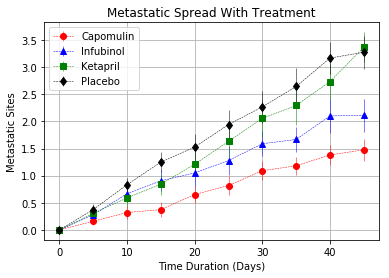

In [23]:
# Generate the Plot (with Error Bars)
assignments = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]
for drug, markers, colors in assignments:
    ste = metsite_se[drug]
    meta_response = plt.errorbar(metsite_pivot.index, metsite_pivot[drug], ste, fmt=markers, ls='--', color=colors, linewidth=0.5)

plt.legend(loc="best")
plt.title("Metastatic Spread With Treatment")
plt.xlabel("Time Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()

# Save the Figure
plt.savefig("metastatic_spread_with_treatment.png")
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_dtp = combined_df.groupby(['Drug','Timepoint'])['Mouse ID']
mouse_dtp
count_mouse = mouse_dtp.count()
count_mouse = count_mouse.reset_index()

# Preview DataFrame
count_mouse.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [28]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot= count_mouse.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
mouse_pivot.head(15)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


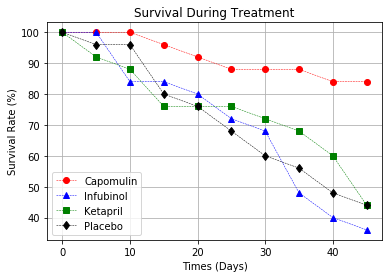

In [24]:
# Generate the Plot (Accounting for percentages)
assignments = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]
for drug, marker, colors in assignments:
    total_mouse = mouse_pivot[drug][0]
    survival_rate = (mouse_pivot[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(mouse_pivot.index, survival_rate, marker=marker, ls='--', color=colors, linewidth=0.5)

plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig("survival_during_treatment.png")
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
percentage_change = (tumor_pivot.iloc[-1]/(tumor_pivot.iloc[0])-1)*100

# Display the data to confirm
percentage_change.head(10)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [16]:
# Question for TAs:
# Why doesn't change = tumor_pivot.pct_change() give the same answer?

In [17]:
y_series=[]
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
for drug in drug_list:
    y_series.append(percentage_change[drug])

#Splice the data between passing and failing drugs
green = percentage_change < 0

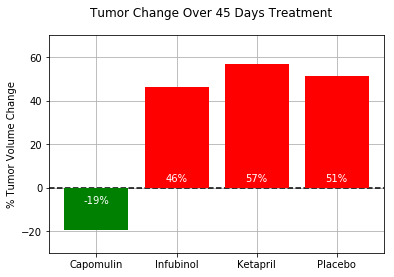

In [25]:
fig, ax =plt.subplots()
fig.suptitle("Tumor Change Over 45 Days Treatment")
ax.set_ylim(-30,70)
ax.set_ylabel("% Tumor Volume Change")

ax.grid()
ax.set_axisbelow(True)
plt.axhline(y=0, color = 'black', linestyle = "--") 
plot = ax.bar(drug_list, y_series, align='center', color=green.map({True:"g",False:"r"}), zorder=3)

# Use functions to label the percentages of changes
def label(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

label(plot)

# Save the Figure
plt.savefig("tumor_change_45_days_treatment.png")
plt.show()